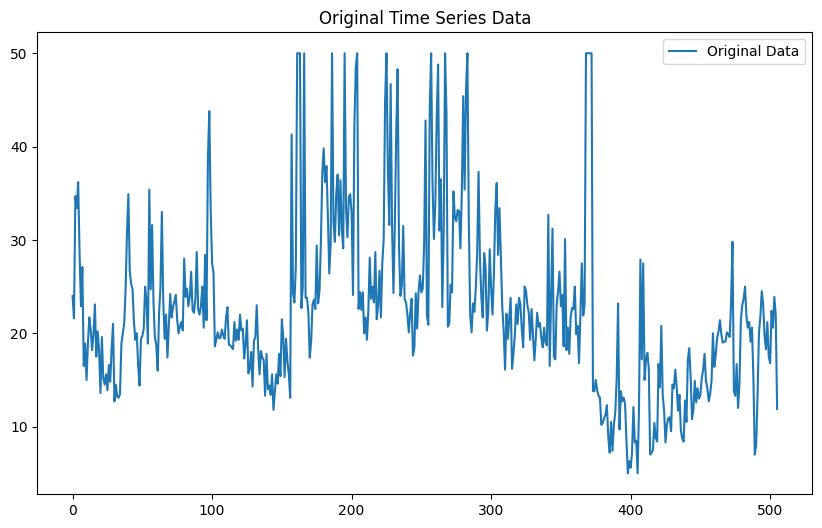

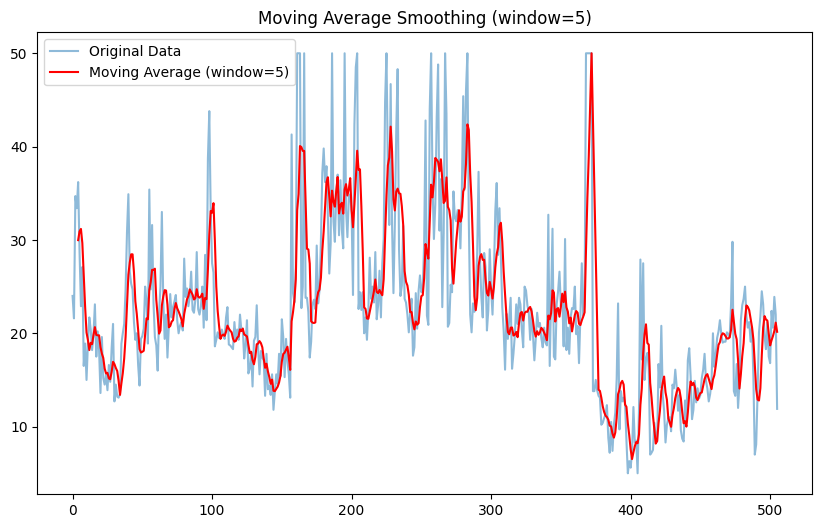

   target  Moving_Avg
4    36.2       29.98
5    28.7       30.92
6    22.9       31.18
7    27.1       29.66
8    16.5       26.28


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Boston Housing dataset (or any time series dataset)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Reshape data correctly
target = raw_df.values[1::2, 2]  # Extract target variable

# Create DataFrame
df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['target'] = target

# Plot original time series data (target variable)
plt.figure(figsize=(10, 6))
plt.plot(df['target'], label='Original Data')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

# Apply Moving Average Smoothing (window size = 5)
window_size = 5
df['Moving_Avg'] = df['target'].rolling(window=window_size).mean()

# Plot Smoothed Time Series
plt.figure(figsize=(10, 6))
plt.plot(df['target'], label='Original Data', alpha=0.5)
plt.plot(df['Moving_Avg'], label=f'Moving Average (window={window_size})', color='red')
plt.title(f'Moving Average Smoothing (window={window_size})')
plt.legend()
plt.show()

# Optionally, drop rows with NaN values (due to the rolling window)
df.dropna(inplace=True)

# Display the first few rows of the DataFrame with the smoothed data
print(df[['target', 'Moving_Avg']].head())
